In [1]:
  !unzip data_lab6.zip


Archive:  data_lab6.zip
  inflating: data/prices.npy         
  inflating: data/training_data.npy  


In [2]:
import numpy as np 
from sklearn.utils import shuffle 
# load training data
training_data = np.load('data/training_data.npy') 
prices = np.load('data/prices.npy') 
# print the first 4 samples 
print('The first 4 samples are:\n ', training_data[:4]) 
print('The first 4 prices are:\n ', prices[:4]) 
# shuffle 
training_data, prices = shuffle(training_data, prices, random_state=0)

The first 4 samples are:
  [[2.0150e+03 4.1000e+04 1.9670e+01 1.5820e+03 1.2620e+02 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0110e+03 4.6000e+04 1.8200e+01 1.1990e+03 8.8700e+01 5.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0120e+03 8.7000e+04 2.0770e+01 1.2480e+03 8.8760e+01 7.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0130e+03 8.6999e+04 2.3080e+01 1.4610e+03 6.3100e+01 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]]
The first 4 prices are:
  [12.5  4.5  6.   3.5]


#### Exercitiul 1

Pentru primul exercitiu putem folosi functia din laboratorul trecut, si o apelam cu parametrul type='standard'.

In [3]:
from sklearn.preprocessing import StandardScaler, Normalizer
def normalize_data_v2(train_data, test_data, type=None):
  if type=='standard':
    scaler = StandardScaler()
    scaler.fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)
  elif type=='l2':
    normalizer = Normalizer(norm='l2')
    train_data = normalizer.transform(train_data)
    test_data = normalizer.transform(test_data)
  elif type =='l1':
    normalizer = Normalizer(norm='l1')
    train_data = normalizer.transform(train_data)
    test_data = normalizer.transform(test_data)
  return train_data, test_data

#### Exercitiul 2
Pentru exercitiul 2 este nevoie sa evaluam performanta modelului folosind validarea incrucisata cu 3 fold-uri. Pentru asta impartim setul de antrenare in 3 subset-uri de lungime egala si antrenam pe 2 dintre ele si testam pe cel care a ramas(calculam metricile MSE si MAE pt subset-ul acesta). Si repetam asta pentru toate alegerile posibile.

Din punct de vedere al implementarii ne folosim de clasa KFold, care ne intoarce iterativ indecsii pentru toate alegerile posibile ale celor 2 subseturi de antrenare si al celui de testare.


Mai jos sunt ilustrate cele 3 cazuri de impartire in subset-uri. Deci, Fold1 este prima iteratie a for-ului, Fold 2 a 2-a iteratie, iar Fold 3 este a 3-a.

In imagine este ilustrat si cum se testeaza pe un subset de test care este pus deoparte, dar pentru noi nu este cazul, nu avem un asemenea subset.






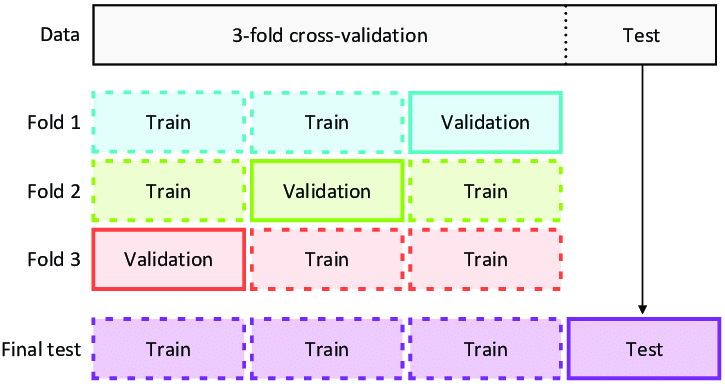

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
 # definirea modelelor 
from sklearn.model_selection import KFold
cv = KFold(n_splits=3,random_state=42,shuffle=True)
mse = []
mae = []
for train_index, test_index in cv.split(training_data):

    print("Train Index: ", train_index)
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = training_data[train_index], training_data[test_index], prices[train_index], prices[test_index]
    X_train, X_test = normalize_data_v2(X_train,X_test, type='standard')
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    output = linear_regression_model.predict(X_test)
   
    mse.append(mean_squared_error(y_test, output))
    mae.append(mean_absolute_error(y_test, output))
  
print("Mean mse:", np.mean(mse))

print("Mean mae:", np.mean(mae))
    

Train Index:  [   0    1    2 ... 4873 4874 4876]
Test Index:  [   6    8   12 ... 4875 4877 4878]
Train Index:  [   2    3    4 ... 4875 4877 4878]
Test Index:  [   0    1    7 ... 4869 4872 4876]
Train Index:  [   0    1    6 ... 4876 4877 4878]
Test Index:  [   2    3    4 ... 4871 4873 4874]
Mean mse: 3.163104
Mean mae: 1.3170942


#### Exercitiul 3

In exercitiul 3 avem un exemplu de folosire a cross validarii pentru a alege cel mai bun parametru pentru un model (in cazul acesta parametrul este alpha si modelul este regresia Ridge).

Din punct de vedere al implementarii, este foarte asemanator cu exercitiul 2, diferentele sunt: trebuie sa avem o iteratie pentru valorile lui alpha si sa folosim regresia Ridge.



In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
 # definirea modelelor 
from sklearn.model_selection import KFold
cv = KFold(n_splits=3,random_state=42,shuffle=True)
alphas = [1.,10.,100.,1000.]
mse_dict = {}
mae_dict = {}
for train_index, test_index in cv.split(training_data):

    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = training_data[train_index], training_data[test_index],\
     prices[train_index], prices[test_index]
    X_train, X_test = normalize_data_v2(X_train,X_test, type='standard')
      
    for alpha in alphas:
      linear_regression_model = Ridge(alpha=alpha)
      linear_regression_model.fit(X_train, y_train)
      output = linear_regression_model.predict(X_test)
      if alpha not in mse_dict:
        mse_dict[alpha] =[mean_squared_error(y_test, output)]
      else:
        mse_dict[alpha].append(mean_squared_error(y_test, output))

      if alpha not in mae_dict:
        mae_dict[alpha] =[mean_absolute_error(y_test, output)]
      else:
        mae_dict[alpha].append(mean_absolute_error(y_test, output))
      
      
for alpha in alphas:
  print(f"Alpha:{alpha}, Mean mse:{np.mean(mse_dict[alpha])}")

  print(f"Alpha:{alpha}, Mean mae:{np.mean(mae_dict[alpha])}\n")
    

Train Index:  [   0    1    2 ... 4873 4874 4876]
Test Index:  [   6    8   12 ... 4875 4877 4878]
Train Index:  [   2    3    4 ... 4875 4877 4878]
Test Index:  [   0    1    7 ... 4869 4872 4876]
Train Index:  [   0    1    6 ... 4876 4877 4878]
Test Index:  [   2    3    4 ... 4871 4873 4874]
Alpha:1.0, Mean mse:3.1630923748016357
Alpha:1.0, Mean mae:1.3170708417892456

Alpha:10.0, Mean mse:3.16306471824646
Alpha:10.0, Mean mae:1.3168717622756958

Alpha:100.0, Mean mse:3.168887138366699
Alpha:100.0, Mean mae:1.3163591623306274

Alpha:1000.0, Mean mse:3.4315528869628906
Alpha:1000.0, Mean mae:1.365923285484314



#### Exercitiul 4

Importanta atributelor este proportionala cu valoarea absoluta a coeficientului asociat (w). Astfel cel mai semnificativ atribut este cel cu coeficientul cel mai mare in valoare absoluta. In cazul nostru este atributul 0, care conform informatiei din laborator corespunde cu anul fabricatiei. 

In [ ]:
linear_regression_model = Ridge(alpha=10)
X_train, _ = normalize_data_v2(training_data,training_data, type='standard')
linear_regression_model.fit(X_train, prices)

Ridge(alpha=10)

In [ ]:
linear_regression_model.coef_

array([ 1.6635194 , -0.15533523, -0.460348  ,  0.40463245,  1.3356806 ,
        0.13251357, -0.08683431,  0.        ,  0.36666504, -0.36666527,
        0.        ,  0.        , -0.22937657,  0.2293704 ], dtype=float32)

In [ ]:
linear_regression_model.intercept_

5.69513

#### Ilustrare folosire Random Forest si Grid Search CV

Pentru a ilustra cum functioneaza RandomForest si GridSearchCV, o sa folosesc setul de date pus la dispozitie in laboratorul 3.

Subliniez ca aceste metode sunt doar niste sugestii, nu inseamna neaparat ca se vor descurca foarte bine in competitia Kaggle.



In [8]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [43]:

train_images = np.loadtxt('./data/train_images.txt') 
train_labels = np.loadtxt('./data/train_labels.txt', 'float')
test_images = np.loadtxt('./data/test_images.txt') 
test_labels = np.loadtxt('./data/test_labels.txt', 'float')
train_labels = train_labels.astype(dtype=int)
test_labels = test_labels.astype(dtype=int)

RandomForest este un model de clasificare puternic datorita faptului ca este un ansamblu de modele mai slabe(arbori de decizie) care sunt antrenati pe subset-uri diferite de date si cu subset-uri diferite de atribute. Iar la final aceste modele slabe voteaza clasa care va fi considerata predictie.

Are un parametru important n_estimators, prin este specificat numarul de modele slabe implicate in proces.

Mai jos antrenam un astfel de model RandomForest si vedem ca acuratetea este de 87%

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=10)
rf.fit(train_images,train_labels)

RandomForestClassifier(n_estimators=20, random_state=10)

In [64]:
from sklearn.metrics import accuracy_score

pred_labels = rf.predict(test_images)
accuracy_score(test_labels,pred_labels)

0.87

Mai departe ilustram cum putem folosi GridSearchCV pentru a gasi combinatia buna de parametrii pentru RandomForest. Pe langa parametrul 'n_estimators', mai cautam si valoarea corecta pentru 'criterion'.


Cum functioneaza GridSearchCV? Cu ajutorul cross validarii gaseste combinatia cea mai buna de parametrii atunci cand este executata functia fit. Deci, executa cross validare pentru fiecare combinatie posibila (de aceea e posibil sa dureze mult in unele cazuri).

Vedem ca dupa acest search de parametrii acuratetea a crescut la 90%.

In [61]:
from sklearn.model_selection import GridSearchCV
randomForest = RandomForestClassifier(random_state=10)
parameters = {'n_estimators':[5,10, 50, 100, 150, 200], 'criterion':["gini", "entropy"]}
cv = GridSearchCV(randomForest, parameters)
cv.fit(train_images, train_labels)

GridSearchCV(estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [5, 10, 50, 100, 150, 200]})

In [62]:
from sklearn.metrics import accuracy_score

pred_labels = cv.predict(test_images)
accuracy_score(test_labels,pred_labels)

0.908